In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_30960/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r'/home/ahmed/Ai/datasets/ml_data/archive (1)/Salary_Data.csv')
df
x_train , y_train = list(df['YearsExperience']), list(df['Salary'])

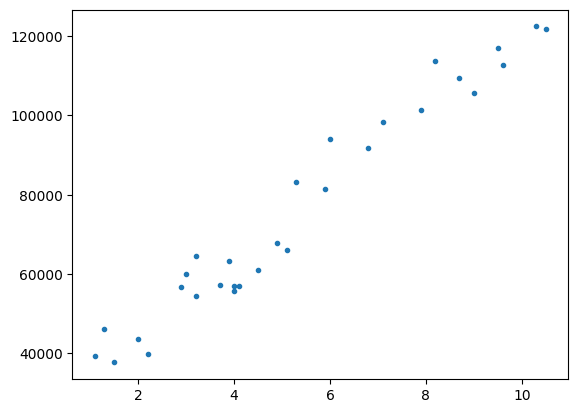

In [3]:
plt.scatter(
    x_train,
    y_train,
    marker = '.',
)
plt.show()

In [4]:
'''
x -> x_train
y -> y_train

w, b -> model parametars
Computing the cost of the model in case selecting parametars (w, b)
'''
def cost_compute(x, y, w, b):

    cost_i , total_cost, n = 0, 0, len(x)

    for i in range(n):
        cost_i = ((w * x[i] + b) - y[i]) ** 2
        total_cost += cost_i
    
    total_cost = total_cost * (1 / (2 * n))

    return total_cost    

In [5]:
'''
Calculate the derivative part of the grediant desent
where:

d_dw_i is result of derivative part in w equation
d_db_i is result of derivative part in b equation

'''

def compute_gradient(x, y, w, b): # just derivative part
    
    n = len(x)
    
    d_dw, d_db = 0, 0
    
    for i in range(n):
        f_wb = w * x[i] + b
        
        d_dw_i = (f_wb - y[i]) * x[i]
        d_db_i = f_wb - y[i]
        
        d_dw += d_dw_i
        d_db += d_db_i
    
    d_db /= n
    d_dw /= n
    return d_dw, d_db


In [6]:


def gradiant_descent(x, y, w_int, b_int, alpha, iterations):

    j_function = [0]
    all_parameters = [0]
    
    w = w_int
    b = b_int
    
    for i in range(iterations + 1):
        
        di_dw, di_db = compute_gradient(x, y,w, b)

        b = b - alpha * di_db
        w = w - alpha * di_dw
    
        j_function.append(cost_compute(x, y, w, b))
        all_parameters.append([w, b])
        if i % 100 == 0 :
            print(f"iteration {i}:  cost {j_function[-1]}:  w {w}:   b {b}:  d_dw {di_dw}:    d_db {di_db}")

    return w, b, j_function, all_parameters
    

In [7]:
w_init = 0
b_init = 0
iterations = 100000
temp_alpha = 1.0e-2


w_final, b_final, j, par = gradiant_descent(x_train, y_train, w_init, b_init, temp_alpha, iterations)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

NameError: name 'compute_gredient' is not defined

In [ ]:
def calculate_predicted_values(x_train, w, b):
    m = len(x_train)
    f_wb = [0] * m
   
    for i in range(m):
        f_wb[i] = w * x_train[i] + b
    return f_wb
 
f_wb = calculate_predicted_values(x_train, w_final, b_final)

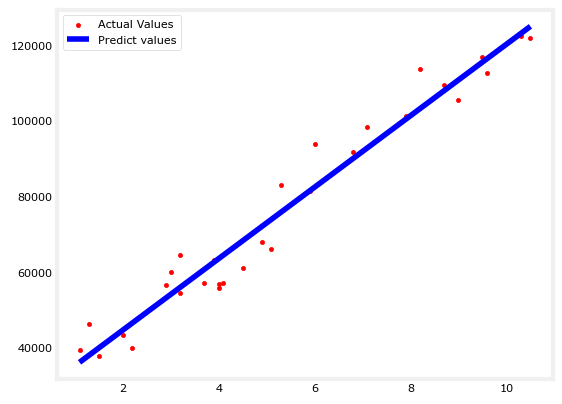

In [ ]:
plt.scatter(
    x = x_train,
    y = y_train,
    color='red',
    marker='.',
    label = 'Actual Values'
)

plt.plot(
    x_train,
    f_wb,
    color = 'blue',
    label = 'Predict values'
)

plt.legend()
plt.show()